# PREDICTING THE SELLING PRICE OF CARS

Author: Oluwatimilehin Folarin

Date: 03-07-2022

### PROBLEM STATEMENT

In this python project, I will be predicting the selling price of cars for a Nigerian automobile company - Great Motors.

Great Motors deals in used cars, with a huge market base in Nigeria. The company has a unique platform where customers can buy and sell cars. A seller posts details about the vehicle for review by the company’s mechanic on the platform to ascertain the vehicle's value. The company then lists the car for sale at the best price. Great Motors makes its profit by receiving a percentage of the selling price listed on the company platform. To ensure the car's selling price is the best for both the customer selling the vehicle and Great Motors, I am coming up with a predictive model for determining the price of the car based on the available data the mechanics have submitted to you.

### THE DATASET

#### Data Description

##### Content
Each row represents a particular vehicle, each column contains vehicles's features described in the data.

The data set includes information about:

VehicleID: This is the unique identifier of the car.
Location:	This is the location in Nigeria where the seller is based.
Maker:	This is the manufacturer of the car. It is the brand name.
Model:	This is the the name of the car product within a range of similar car products.
Year:	This is the year the car was manufactured.
Colour:	This is the colour of the car.
Amount: (Million Naira)	This is the selling price of the car. It is the amount the company will sell the car.
Type:	This is the nature of previous use of the car, whether it was previously used within Nigeria or outside Nigeria.
Distance:	This is the mileage of the car. It is how much distance it covered in its previous use

### FILES

The train data contains 7205 rows (vehicles) and 9 columns (8 features, 1 target).

The test data contains 2061 rows (vehicles) and 8 columns (8 features).


The “Amount(Million Naira)” column is our target.

## Importing basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Importing datasets

In [2]:
data = pd.read_csv(r'C:\Users\Oluwatimilehin F\Documents\Data SC\DSN AI INVASION\Train.csv')
data_2 = pd.read_csv(r'C:\Users\Oluwatimilehin F\Documents\Data SC\DSN AI INVASION\Test.csv')

## Exploratory Data Analysis

### Showing the head and tail of the train and test data

In [3]:
print ("\nHead of the train data")

data.head()


Head of the train data


,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.2,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.5,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.2,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,22.8,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.6,Nigerian Used,"125,206"


In [4]:
print ("\nTail of the train data")

data.tail()


Tail of the train data


,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
7200,VHL14329,Abuja,Honda,Civic,"2,018",Gray,5.70,Foreign Used,"65,000"
7201,VHL10637,Abuja,BMW,X3,"2,007",White,4.00,Nigerian Used,"200,000"
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,"2,010",Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,"2,012",Black,8.65,Foreign Used,"85,750"
7204,VHL15246,Abuja,Honda,Accord Crosstour,"2,012",Gray,3.38,Nigerian Used,"83,308"


In [5]:
print ("\nHead of the test data")

data_2.head()


Head of the test data


,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,"2,008",White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,"2,013",White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,"2,005",Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,"2,011",Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,"2,013",Red,Foreign Used,88862.0


In [6]:
print ("\nTail of the test data")

data_2.tail()


Tail of the test data


,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
2056,VHL17903,Abuja,Toyota,Avalon,"2,020",Red,Foreign Used,2650.0
2057,VHL14018,Ibadan,Audi,Q5,"2,011",Blue,Foreign Used,99000.0
2058,VHL17473,Ibadan,Toyota,Camry,"2,015",Black,Foreign Used,108000.0
2059,VHL11480,Abuja,Lexus,IS 350 AWD,"2,013",White,Foreign Used,52485.0
2060,VHL13881,Abuja,Pontiac,Torrent,"2,009",Silver,Foreign Used,124088.0


### Sum of null values in each columns of the train and test data

In [7]:
print ("\nSum of null values in each columns of the train data")

data.isnull().sum()


Sum of null values in each columns of the train data


VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [8]:
print ("\nNull values in each columns of the test data")

data_2.isnull().sum()


Null values in each columns of the test data


VehicleID      0
Location       0
Maker          0
Model          0
Year           2
Colour         0
Type          54
Distance     676
dtype: int64

### Replacing the null selling price of cars with mean value

In [9]:
mean_amount = data['Amount (Million Naira)'].mean()

data['Amount (Million Naira)'] = data['Amount (Million Naira)'].fillna(mean_amount)


### The (rows, columns) of the train and test data

In [10]:
print ("\nShape of the train data")

data.shape


Shape of the train data


(7205, 9)

In [11]:
print ("\nShape of the test data")

data_2.shape


Shape of the test data


(2061, 8)

### Value counts of columns in the train data

In [12]:
data['Year'].value_counts()

2,008    755
2,010    618
2,013    599
2,007    484
2,012    460
2,011    455
2,009    439
2,014    412
2,015    369
2,006    349
2,005    298
2,017    291
2,016    280
2,018    269
2,004    222
2,020    204
2,019    189
2,021    145
2,003    122
2,002     74
2,001     55
2,000     39
1,999     19
1,998     11
2,022     10
1,997      5
1,992      3
1,986      2
1,995      2
1,993      1
1,996      1
1,979      1
1,989      1
Name: Year, dtype: int64

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

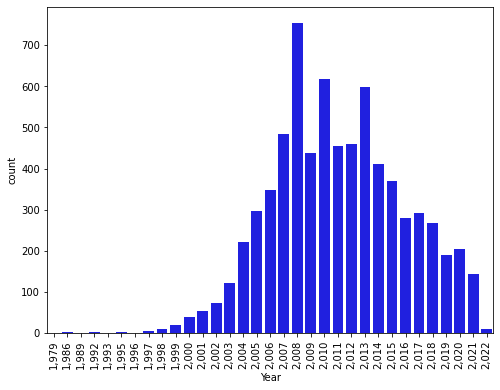

In [13]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(data['Year'].sort_values(), color='blue')

In [14]:
data['Amount (Million Naira)'].value_counts()

4.50     157
5.50     120
6.50     101
3.50      90
4.00      82
        ... 
2.84       1
14.85      1
8.79       1
1.00       1
19.10      1
Name: Amount (Million Naira), Length: 743, dtype: int64

In [15]:
data['Colour'].value_counts()

Black       2128
Gray        1152
Silver      1123
White       1019
Blue         554
Red          478
Gold         357
Green        179
Brown        114
Burgandy      27
Beige         25
Purple        16
Orange        11
Yellow         7
Pink           7
Ivory          3
Violet         1
G              1
Teal           1
Mica           1
Pearl          1
Name: Colour, dtype: int64

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Colour', ylabel='count'>

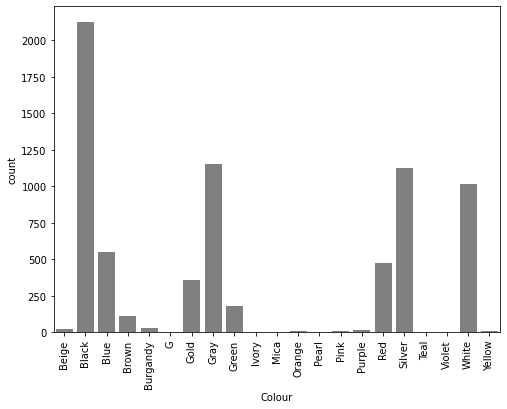

In [16]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(data['Colour'].sort_values(), color = 'grey')

In [17]:
data['Location'].value_counts()

Lagos     3318
Abuja     3263
Ibadan     624
Name: Location, dtype: int64

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Location', ylabel='count'>

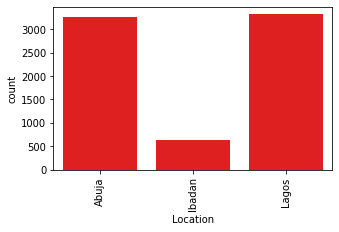

In [18]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
sns.countplot(data['Location'].sort_values(), color='red')

In [19]:
data['Type'].value_counts()

Foreign Used     4896
Nigerian Used    1895
Brand New         217
Name: Type, dtype: int64

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Type', ylabel='count'>

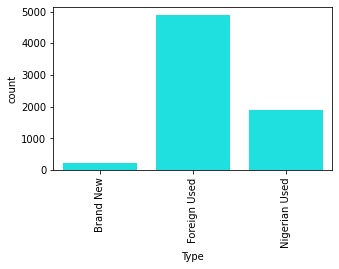

In [20]:
plt.figure(figsize=(5,3))
plt.xticks(rotation=90)
sns.countplot(data['Type'].sort_values(), color='cyan')

In [21]:
data['Maker'].value_counts()

Toyota           2742
Lexus            1599
Mercedes-Benz    1213
Honda             358
Hyundai           162
Acura             154
Land Rover        124
Ford              120
BMW               111
Nissan            101
Peugeot            75
Kia                66
Volkswagen         54
Pontiac            30
Mazda              28
Dodge              24
Audi               23
Mitsubishi         23
Chevrolet          21
Infiniti           18
Jeep               18
Jaguar             12
Rolls-Royce        10
Mini                9
GMC                 8
Suzuki              8
Cadillac            7
Scion               7
Porsche             7
Volvo               7
Bentley             6
Maserati            6
Lincoln             6
Buick               5
Chrysler            4
Lamborghini         4
Opel                4
Rover               3
GAC                 3
Renault             3
Fiat                3
Citroen             2
Subaru              2
Saturn              2
JAC                 2
Hummer    

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Maker', ylabel='count'>

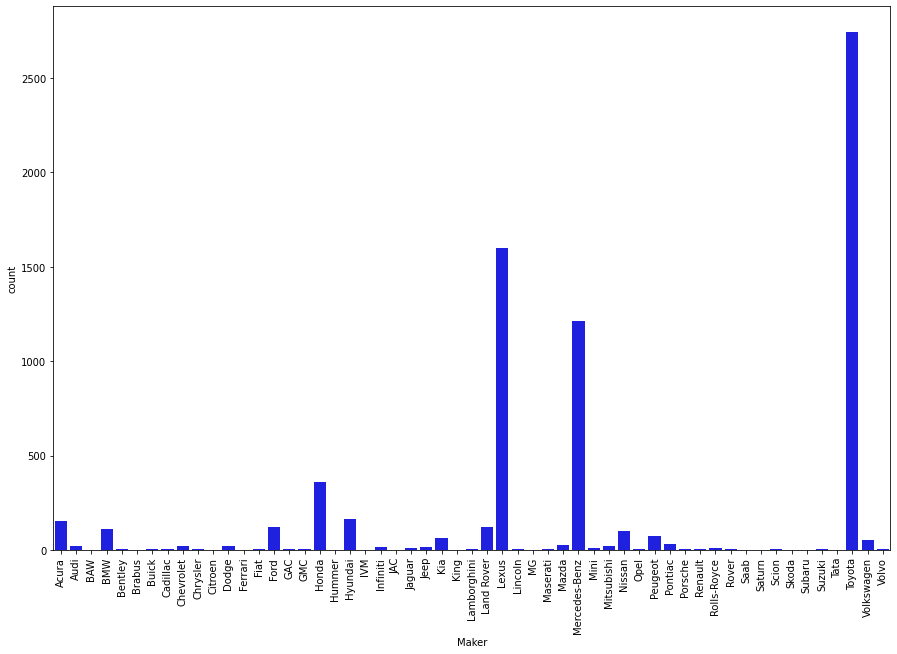

In [22]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
sns.countplot(data['Maker'].sort_values(), color='blue')

In [23]:
data['Model'].value_counts()

Camry                     651
ES 350                    300
Corolla                   282
C300                      199
RX                        158
                         ... 
Accent 1.6                  1
Land Cruiser Prado EXR      1
Lx                          1
CLK                         1
320i SV Premium             1
Name: Model, Length: 1223, dtype: int64

C:\Users\Oluwatimilehin F\AppData\Roaming\Python\Python310\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Year', ylabel='count'>

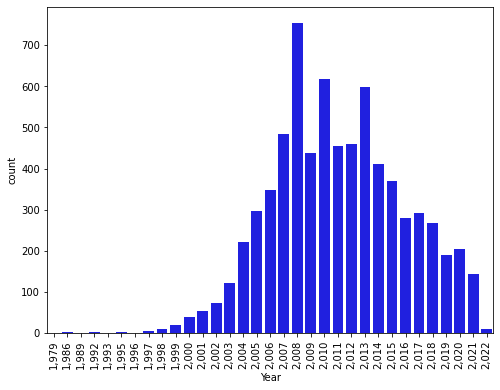

In [24]:
plt.figure(figsize=(8,6))
plt.xticks(rotation=90)
sns.countplot(data['Year'].sort_values(), color='blue')



### Dropping the "Distance" Column having excessive null values of 31.5% of the train data and 26% of the test data

In [25]:
new_data = data.drop("Distance", axis=1)
data_2 = data_2.drop("Distance", axis=1)

### Info

In [26]:
final_data = new_data.copy()

final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7205 entries, 0 to 7204
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   VehicleID               7205 non-null   object 
 1   Location                7205 non-null   object 
 2   Maker                   7205 non-null   object 
 3   Model                   7205 non-null   object 
 4   Year                    7184 non-null   object 
 5   Colour                  7205 non-null   object 
 6   Amount (Million Naira)  7205 non-null   float64
 7   Type                    7008 non-null   object 
dtypes: float64(1), object(7)
memory usage: 450.4+ KB


### Checking the data types of each column

In [27]:
final_data.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                       object
Colour                     object
Amount (Million Naira)    float64
Type                       object
dtype: object

### Converting the "Year" column data type to integer

In [28]:
final_data['Year'] =  final_data['Year'].str.replace(",", "")
    
final_data['Year'] =  final_data['Year'].astype(float).astype('Int64')




data_2['Year'] = data_2['Year'].str.replace(",", "")

data_2['Year'] =  data_2['Year'].astype(float).astype('Int64')


In [29]:
final_data.dtypes

VehicleID                  object
Location                   object
Maker                      object
Model                      object
Year                        Int64
Colour                     object
Amount (Million Naira)    float64
Type                       object
dtype: object

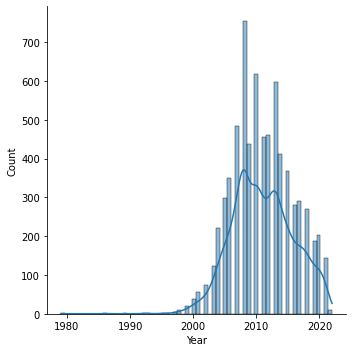

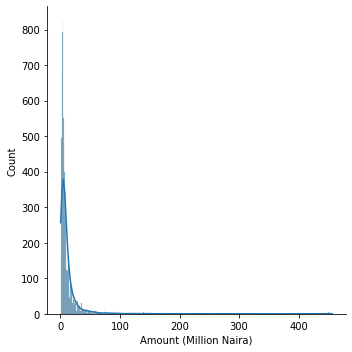

In [30]:
sns.displot(final_data['Year'], kde=True)
sns.displot(final_data['Amount (Million Naira)'], kde=True)

## Combining the train and test data before performing feature engineering

In [31]:
combined = pd.concat([final_data, data_2])
combined.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.2,Nigerian Used
1,VHL18827,Ibadan,Hyundai,Sonata,2012,Silver,3.5,Nigerian Used
2,VHL19499,Lagos,Lexus,RX 350,2010,Red,9.2,Foreign Used
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.8,Foreign Used
4,VHL12170,Ibadan,Toyota,Highlander,2002,Red,2.6,Nigerian Used


In [32]:
combined.shape

(9266, 8)

In [33]:
combined['Location'].value_counts()

Lagos     4240
Abuja     4225
Ibadan     801
Name: Location, dtype: int64

In [34]:
combined['Type'].value_counts()

Foreign Used     6286
Nigerian Used    2442
Brand New         287
Name: Type, dtype: int64

In [38]:
combined['Year'] =  combined['Year'].astype('float64')



mean_year = combined['Year'].mean().round()
mode_type = 'Foreign Used'



combined['Year'] = combined['Year'].fillna(mean_year)
combined['Type'] = combined['Type'].fillna(mode_type)


In [39]:
combined_new = combined.copy()

In [40]:
combined.isnull().sum()

VehicleID                    0
Location                     0
Maker                        0
Model                        0
Year                         0
Colour                       0
Amount (Million Naira)    2061
Type                         0
dtype: int64

### ENCODING

In [41]:
combined_new['Location'] = combined_new['Location'].map({ 
    'Abuja':2,
    'Lagos':1,
    'Ibadan':0
})

combined_new['Type'] = combined_new['Type'].map({ 
    'Foreign Used':2,
    'Nigerian Used':1,
    'Brand New':0
})



In [42]:
combined_new = pd.get_dummies(combined_new, columns = ["Colour", "Maker", "Model"], prefix=["Colour", "Maker", "Model"])

## Splitting the combined data into train and test data

In [43]:
fin_data = combined_new[0:7205]
data_test = combined_new[7205:]

In [44]:
data_test.shape

(2061, 1497)

### Splitting the train data into features(X) and target(y)

In [45]:
X = fin_data.drop(["VehicleID", "Amount (Million Naira)"], axis=1)
y = fin_data["Amount (Million Naira)"]

In [46]:
X.head()


,Location,Year,Type,Colour_Auto,Colour_Beige,Colour_Black,Colour_Blue,Colour_Brown,Colour_Burgandy,Colour_Cream,...,Model_ZT 2 D Automatic,Model_Zafira,Model_Zafira 1.6,Model_Zafira 1.8,Model_Zafira 1.8 Automatic,Model_Zafira 2,Model_iM Base,Model_xA Base,Model_xB Base,Model_xD Base
0,2,2011.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,2012.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2010.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,2017.0,2,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,2002.0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
X.isnull().sum()

Location          0
Year              0
Type              0
Colour_Auto       0
Colour_Beige      0
                 ..
Model_Zafira 2    0
Model_iM Base     0
Model_xA Base     0
Model_xB Base     0
Model_xD Base     0
Length: 1495, dtype: int64

## Modelling and Evaluation

### Splitting train data into train & test with 80% for training

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

### Scaling the features using MinMaxScaler

In [49]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


### Importing Machine Learning Algorithms

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### Determing the best K-value for KNN

Text(0.5, 1.0, 'K-value Vs Mean error')

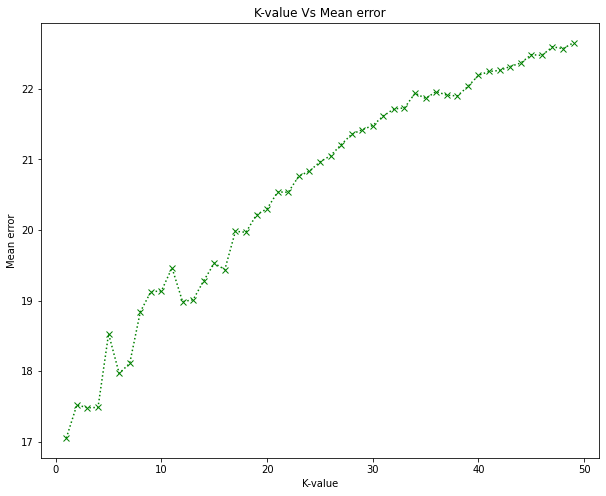

In [51]:
error = []
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

for i in range(1,50):
    kn = KNeighborsRegressor(n_neighbors = i)
    kn.fit(X_train, y_train)
    pred_i = kn.predict(X_test)
    err = sqrt(mean_squared_error(y_test, pred_i)) 
    error.append(err)

plt.figure(figsize = (10,8))
plt.plot(range(1,50), error, color='green', linestyle='dotted', marker='x', markerfacecolor='black')
plt.xlabel("K-value")
plt.ylabel("Mean error")
plt.title("K-value Vs Mean error")


### Initiating the Machine Leanrning Algorithms

In [52]:
modelKNN = KNeighborsRegressor(n_neighbors = 3)


modelRFR = RandomForestRegressor(n_estimators = 100, random_state = 0)

modelDTR = DecisionTreeRegressor(random_state = 0)

modelSVR = SVR(kernel = 'rbf')


### Training Machine Learning Algorithms

In [53]:
modelKNN.fit(X_train, y_train)
modelRFR.fit(X_train, y_train)
modelDTR.fit(X_train, y_train)
modelSVR.fit(X_train, y_train)

SVR()

### Predicting the test dataset

In [54]:
modelKNN_pred = modelKNN.predict(X_test)
modelRFRy_pred = modelRFR.predict(X_test)
modelDTRy_pred = modelDTR.predict(X_test)
modelSVRy_pred = modelSVR.predict(X_test)

### Evaluating the model performance

In [55]:
from sklearn.metrics import r2_score
print("KNeighborsRegressor R2 score: {}".format(r2_score(y_test, modelKNN_pred)))
print("Random Forest Regression R2 score: {}".format(r2_score(y_test, modelRFRy_pred)))
print("Decision Treee Regression R2 score: {}".format(r2_score(y_test, modelDTRy_pred)))
print("Support Vector Regression R2 score: {}".format(r2_score(y_test, modelSVRy_pred)))

KNeighborsRegressor R2 score: 0.6406031542292241
Random Forest Regression R2 score: 0.7654605154485294
Decision Treee Regression R2 score: 0.24383083398072236
Support Vector Regression R2 score: 0.0805524047018017


## The best performing algorithm is Random Forest Regressor

In [56]:
RFR = RandomForestRegressor(n_estimators = 100, random_state = 0)
RFR.fit(X_train, y_train)
RFR_y_pred = modelRFR.predict(X_test)
RFR_err = sqrt(mean_squared_error(y_test, RFR_y_pred))
RFR_r2_score = (r2_score(y_test, modelRFRy_pred))

print("Random Forest Regression R2_Score is: {}".format(RFR_r2_score))
print(f"Random Forest Regression Root mean sqaured value is {RFR_err}" )

Random Forest Regression R2_Score is: 0.7654605154485294
Random Forest Regression Root mean sqaured value is 14.120011874800225


In [57]:
RFR_final = RandomForestRegressor(n_estimators = 100, random_state = 0)

sc = MinMaxScaler(feature_range=(0, 1))
X_sc = sc.fit_transform(X)
RFR_final.fit(X_sc, y)

RandomForestRegressor(random_state=0)

## Working on the external test data for prediction

In [58]:
data_test['Year']

0       2008.0
1       2013.0
2       2005.0
3       2011.0
4       2013.0
         ...  
2056    2020.0
2057    2011.0
2058    2015.0
2059    2013.0
2060    2009.0
Name: Year, Length: 2061, dtype: float64

In [59]:
data_test = data_test.drop(['VehicleID','Amount (Million Naira)'], axis=1)

In [60]:
data_test.isnull().sum()

Location          0
Year              0
Type              0
Colour_Auto       0
Colour_Beige      0
                 ..
Model_Zafira 2    0
Model_iM Base     0
Model_xA Base     0
Model_xB Base     0
Model_xD Base     0
Length: 1495, dtype: int64

In [61]:
data_test.shape

(2061, 1495)

### Checking for null values

In [62]:
data_test.isna().sum()

Location          0
Year              0
Type              0
Colour_Auto       0
Colour_Beige      0
                 ..
Model_Zafira 2    0
Model_iM Base     0
Model_xA Base     0
Model_xB Base     0
Model_xD Base     0
Length: 1495, dtype: int64

In [63]:
f_test_data = data_test.copy()


x_t = f_test_data

In [64]:
x_t.shape

(2061, 1495)

### Checking if the number of columns in the main train data is equal to the number of columns for prediction

In [65]:
set(x_t.columns) - set(X.columns)

set()

### Scaling and predicting

In [66]:
x_t_sc = sc.transform(x_t)
y_pred_test = RFR_final.predict(x_t_sc)

In [67]:
y_pred_test = y_pred_test.round(2)
y_pred_test


array([ 3.88,  5.85,  4.4 , ...,  6.58, 11.15,  3.44])

## Creating the submission file

In [68]:
vehicle_id = data_2['VehicleID']
vehicle_id_output = np.array(vehicle_id)

In [69]:
vehicle_id_output

array(['VHL18518', 'VHL17149', 'VHL10927', ..., 'VHL17473', 'VHL11480',
       'VHL13881'], dtype=object)

In [70]:
import numpy as np

output = np.vstack([vehicle_id_output, y_pred_test])
output_a     = np.transpose(output)
output_data = pd.DataFrame(output_a)

In [71]:
output_data.head()

,0,1
0,VHL18518,3.88
1,VHL17149,5.85
2,VHL10927,4.4
3,VHL12909,4.17
4,VHL12348,9.91


In [72]:
output_data.rename(columns = {0:'VehicleID', 1:'Amount (Million Naira)'}, inplace = True)

In [73]:
output_data

,VehicleID,Amount (Million Naira)
0,VHL18518,3.88
1,VHL17149,5.85
2,VHL10927,4.4
3,VHL12909,4.17
4,VHL12348,9.91
...,...,...
2056,VHL17903,22.6
2057,VHL14018,4.86
2058,VHL17473,6.58
2059,VHL11480,11.15


In [74]:
output_data.to_csv('Timilehin_submission_final.csv',float_format='%.2f', index= False)